In this notebook, we will implement a multi-variant linear regression model from scratch using Gradient Descent. We will create a dataset based on a 20-day routine, with multiple independent variables and one target/dependent variable. The independent variables will include sleep hours, rank of food quality, working hours, rank of health condition, and rank of mood, while the target variable will be the rank of productivity.

### Importing the necessary libraries and declaring the starting seed.

In [61]:
import numpy as np
import pandas as pd

#### The code snippet defines a function `generate_hours` to create sleep and working hour data for a number of days. It ensures realistic values by setting constraints and scaling down working hours if the total exceeds a specified maximum.```


In [62]:
def generate_hours(n_days):
    # Assume sleep hours are normally distributed around 8 hours with a std deviation of 1
    sleep_hours = np.random.normal(8, 1, n_days)
    # Assume working hours are normally distributed around 8 hours with a std deviation of 2
    working_hours = np.random.normal(8, 2, n_days)
    return sleep_hours, working_hours

n_days = 20  # Number of days you want to simulate
sleep_hours, working_hours = generate_hours(n_days)

This code segment generates data for a set number of days, including sleep hours, ranks for food quality, working hours, health condition, mood, and initial productivity rank.


In [63]:
data = {
    'Sleep Hours': sleep_hours,
    'Rank of Food Quality': np.random.randint(1, 6, size=n_days),  # Random ranks between 1 and 5
    'Working Hours': working_hours,
    'Rank of Health Condition': np.random.randint(1, 6, size=n_days),
    'Rank of Mood': np.random.randint(1, 6, size=n_days),
    'Rank of Productivity': np.random.randint(1, 6, size=n_days)  # Random initial ranking
}

Creation of DF for this question is done by the following code snippet.
This dataset contains information about a 20-day routine, including sleep hours, rank of food quality, working hours, rank of health condition, rank of mood, and rank of productivity.

In [64]:
df = pd.DataFrame(data)

# Compute a continuous Rank of Productivity scaled from 0 to 100
df['Rank of Productivity'] = (0.15 * df['Sleep Hours'] +
                              0.15 * df['Rank of Food Quality'] +
                              0.3 * df['Working Hours'] +
                              0.15 * df['Rank of Health Condition'] +
                              0.25 * df['Rank of Mood'])

# Normalize to 0-100 scale
df['Rank of Productivity'] = 100 * (df['Rank of Productivity'] - df['Rank of Productivity'].min()) / (df['Rank of Productivity'].max() - df['Rank of Productivity'].min())

df

,Sleep Hours,Rank of Food Quality,Working Hours,Rank of Health Condition,Rank of Mood,Rank of Productivity
0,8.647163,4,6.740598,3,5,62.543882
1,8.126095,3,9.753509,5,5,94.932829
2,6.102623,2,9.103474,3,3,46.848608
3,9.280541,5,6.579744,3,5,69.075043
4,7.384866,5,4.424657,2,1,0.000000
5,10.111318,3,5.558860,4,4,49.767124
6,8.686849,4,6.661595,1,1,18.801027
7,8.070972,1,10.323875,2,1,42.246850
8,8.439327,4,11.105720,2,5,100.000000
9,7.891502,3,7.120964,4,4,54.270345


In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming 'df' is your DataFrame
X = df[['Sleep Hours', 'Rank of Food Quality', 'Working Hours', 'Rank of Health Condition', 'Rank of Mood']]
y = df['Rank of Productivity']

# StandardScaler for continuous variables
scaler = StandardScaler()
X[['Sleep Hours', 'Working Hours']] = scaler.fit_transform(X[['Sleep Hours', 'Working Hours']])

# MinMaxScaler for ordinal variables
min_max_scaler = MinMaxScaler()
X[['Rank of Food Quality', 'Rank of Health Condition', 'Rank of Mood']] = min_max_scaler.fit_transform(X[['Rank of Food Quality', 'Rank of Health Condition', 'Rank of Mood']])

/tmp/ipykernel_16220/3565619044.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Sleep Hours', 'Working Hours']] = scaler.fit_transform(X[['Sleep Hours', 'Working Hours']])
/tmp/ipykernel_16220/3565619044.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Rank of Food Quality', 'Rank of Health Condition', 'Rank of Mood']] = min_max_scaler.fit_transform(X[['Rank of Food Quality', 'Rank of Health Condition', 'Rank of Mood']])


Sleep Hours and Working Hours: These are continuous variables and could be standardized to normalize their distribution.
Rank of Food Quality, Rank of Health Condition, Rank of Mood: These ordinal variables can be scaled using Min-Max scaling if you want to keep the interpretability straightforward (i.e., keeping them in a 0-1 range) or standardize if you wish to emphasize the relationship in a more normalized scale.
Rank of Productivity: Since this is your target variable, you generally do not need to scale it for linear regression models.

In [66]:
y

0      62.543882
1      94.932829
2      46.848608
3      69.075043
4       0.000000
5      49.767124
6      18.801027
7      42.246850
8     100.000000
9      54.270345
10     48.038662
11     79.767509
12     74.852067
13     68.174679
14     45.066557
15     72.399809
16     36.984042
17     56.270445
18     36.732125
19     60.886993
Name: Rank of Productivity, dtype: float64

In [67]:
df.to_csv('my_routine_data.csv', index=False)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44)  

In [71]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=random.randint(100, 2000)):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coefficients = random.randint(1, 200)
        self.intercept = random.randint(1, 200)

    def fit(self, X, y):
        n_features = X.shape[1]
        self.coefficients = np.random.rand(n_features)
        self.intercept = np.random.rand()

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.coefficients) + self.intercept
            # Errors
            errors = y_pred - y
            # Mean Squared Error
            mse = (errors ** 2).mean()
            # Gradient w.r.t coefficients
            gradient_coefficients = 2 * np.dot(X.T, errors) / len(X)
            # Gradient w.r.t intercept
            gradient_intercept = 2 * errors.mean()
            # Update the coefficients
            self.coefficients -= self.learning_rate * gradient_coefficients
            # Update the intercept
            self.intercept -= self.learning_rate * gradient_intercept

            # Optionally: record the loss and print it every few epochs
            if _ % (self.epochs // 10) == 0:
                print(f"Epoch {_}: Loss = {mse}")

    def predict(self, X):
        return np.dot(X, self.coefficients) + self.intercept

X = df[['Sleep Hours', 'Rank of Food Quality', 'Working Hours','Rank of Health Condition','Rank of Mood']].values
y = df['Rank of Productivity'].values

model = LinearRegressionGD(learning_rate=0.0001)

model.fit(X, y)

model.coefficients, model.intercept


Epoch 0: Loss = 2671.5302990509213
Epoch 95: Loss = 301.4801703358452
Epoch 190: Loss = 283.3230754730429
Epoch 285: Loss = 270.0944157063636
Epoch 380: Loss = 257.8424064517009
Epoch 475: Loss = 246.482900529544
Epoch 570: Loss = 235.9450011283931
Epoch 665: Loss = 226.16403929887275
Epoch 760: Loss = 217.08096116275595
Epoch 855: Loss = 208.64178901644974
Epoch 950: Loss = 200.7971388031036


(array([0.48551007, 1.27082225, 3.54511815, 2.65348189, 3.56582731]),
 1.0063469208546993)

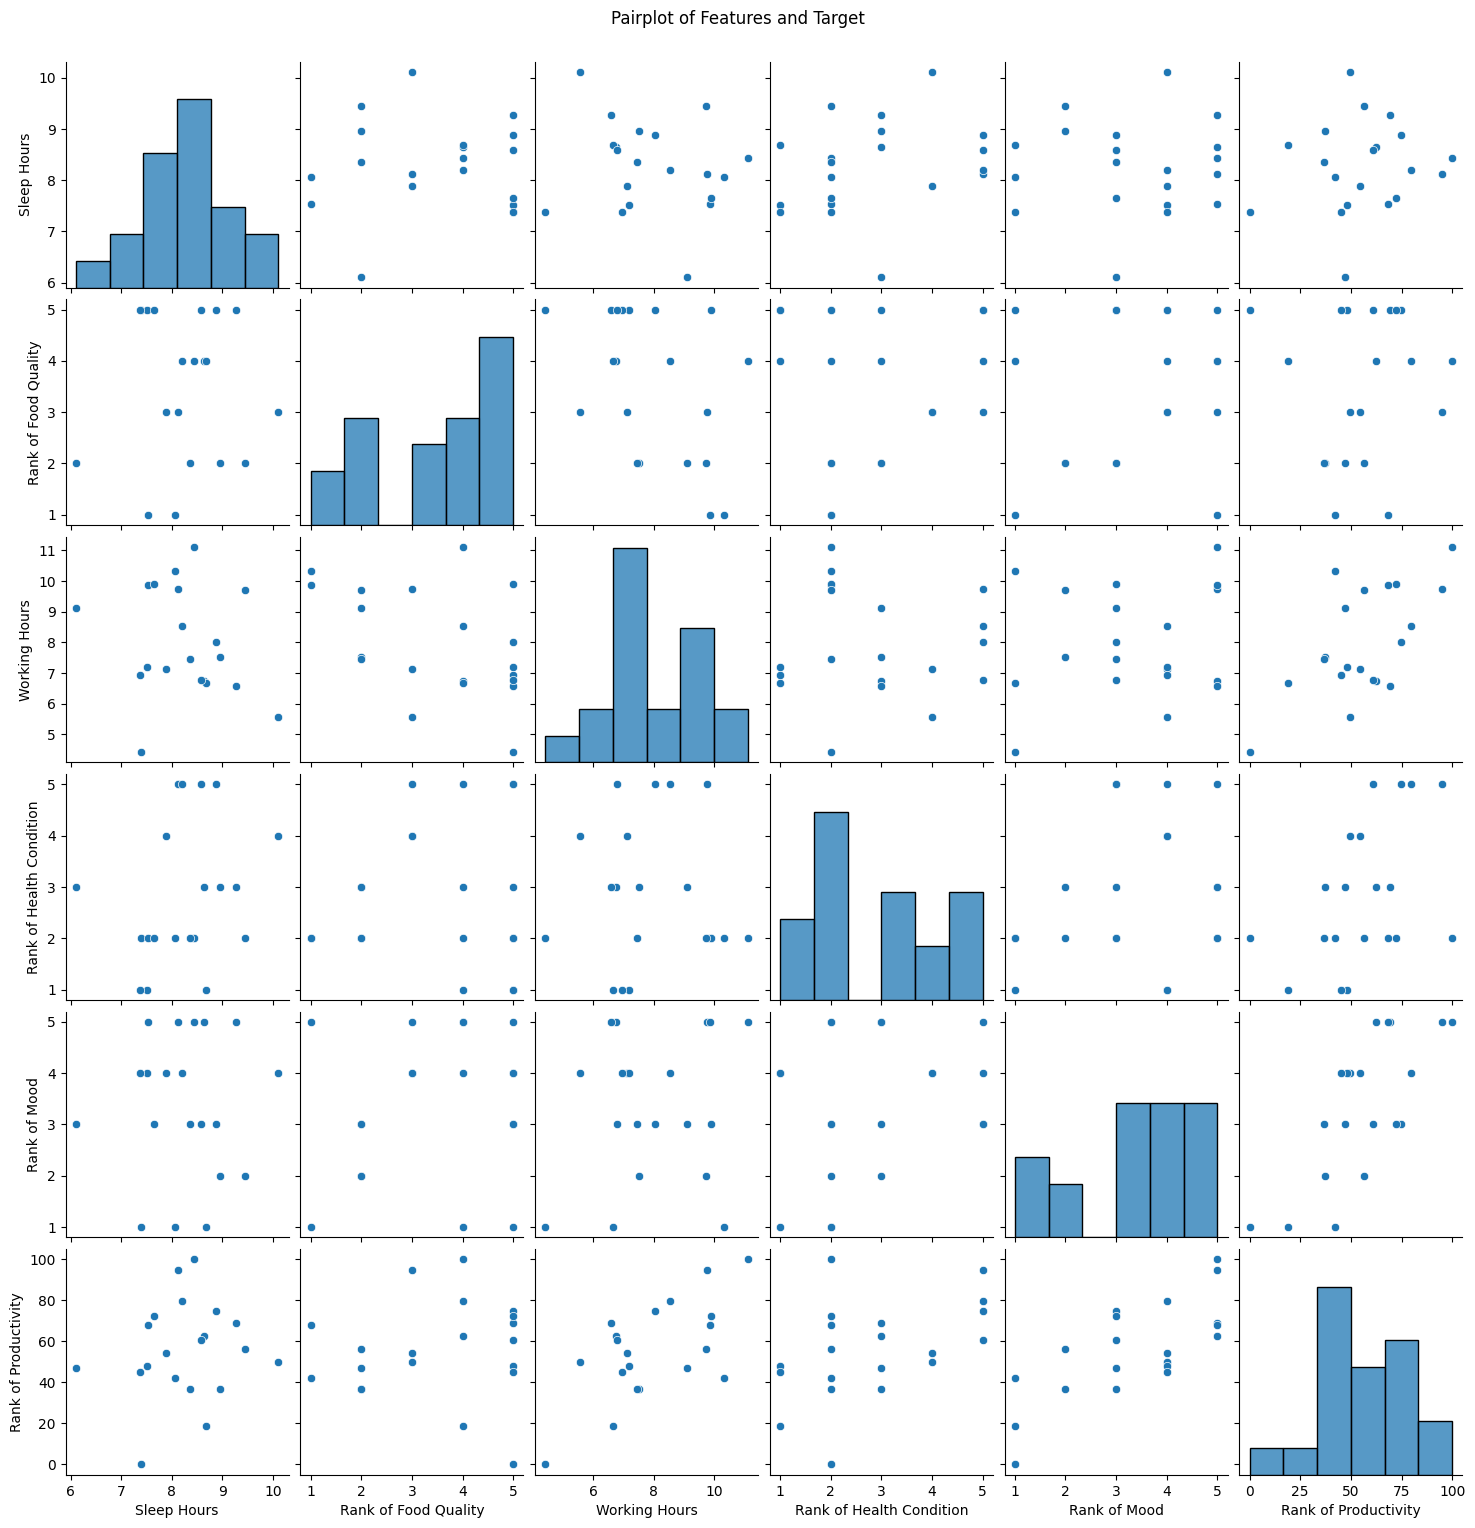

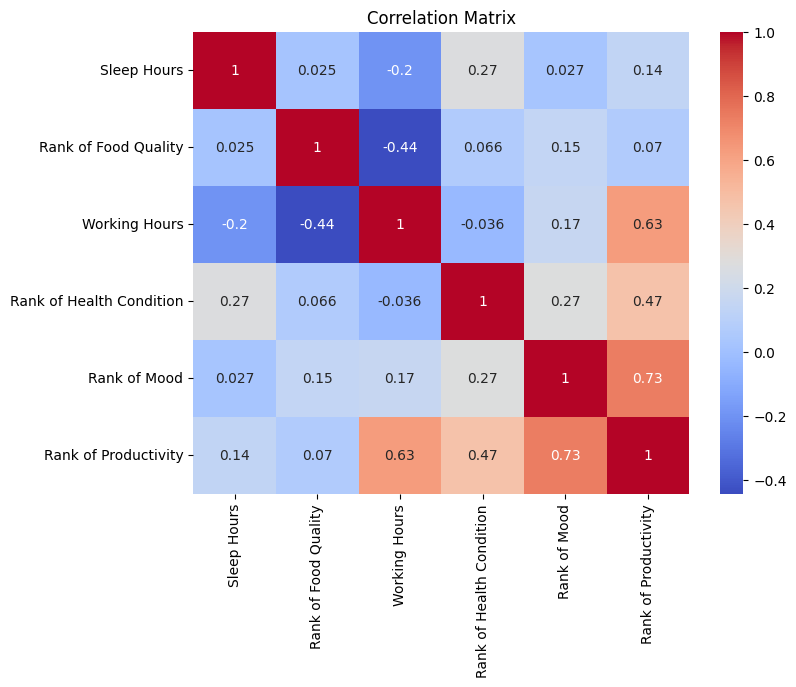

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.suptitle('Pairplot of Features and Target', y=1.02)  # Adjust title position
plt.show()

corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Pairplot: 
This shows scatter plots of each pair of features and the target variable, helping to visualize relationships and distributions. The diagonal histograms show the distribution of each variable.

## Correlation Matrix: 
Displayed as a heatmap, it reveals the strength of the linear relationships between the variables. High positive values suggest strong positive correlations.

In [73]:
class LinearRegressionGDWithHistory(LinearRegressionGD):
    def __init__(self, learning_rate=0.01, epochs=100):
        super().__init__(learning_rate, epochs)
        self.history = {'loss': [], 'coefficients': [], 'intercept': [], 'mae': [], 'mre': []}

    def fit(self, X, y):
        n_features = X.shape[1]
        self.coefficients = np.random.rand(n_features)
        self.intercept = np.random.rand()

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.coefficients) + self.intercept
            errors = y_pred - y

            mse = np.mean(errors ** 2)
            mae = np.mean(np.abs(errors))
            epsilon = 1e-8
            mre = np.mean(np.abs(errors / (y + epsilon)))

            gradient_coefficients = 2 * np.dot(X.T, errors) / len(X)
            gradient_intercept = 2 * np.mean(errors)

            self.coefficients -= self.learning_rate * gradient_coefficients
            self.intercept -= self.learning_rate * gradient_intercept

            self.history['loss'].append(mse)
            self.history['coefficients'].append(self.coefficients.copy())
            self.history['intercept'].append(self.intercept)
            self.history['mae'].append(mae)
            self.history['mre'].append(mre)

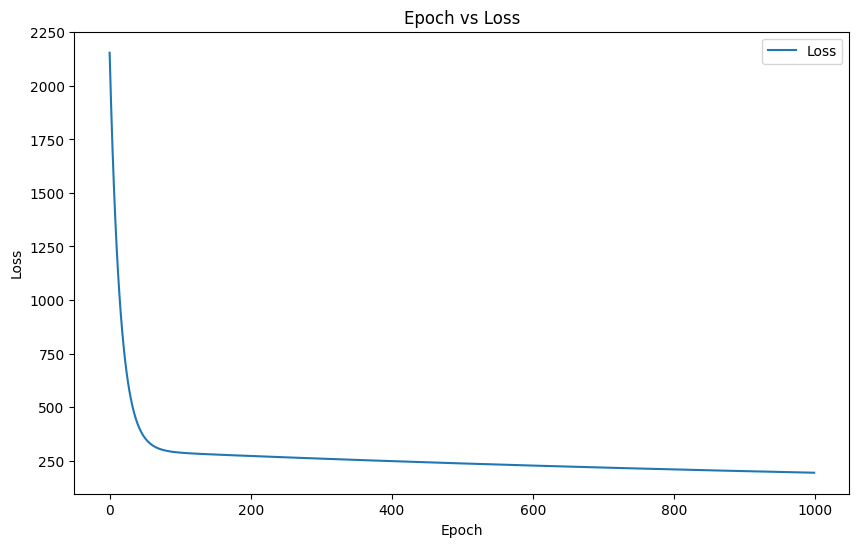

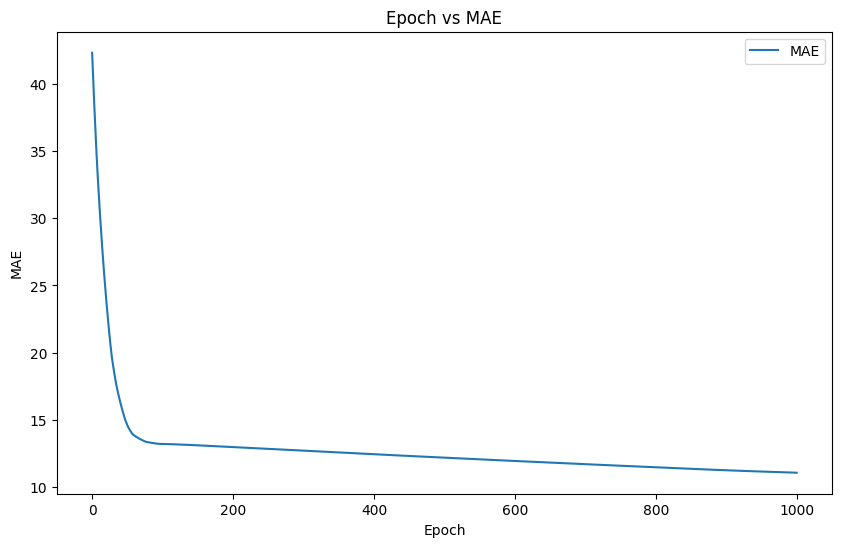

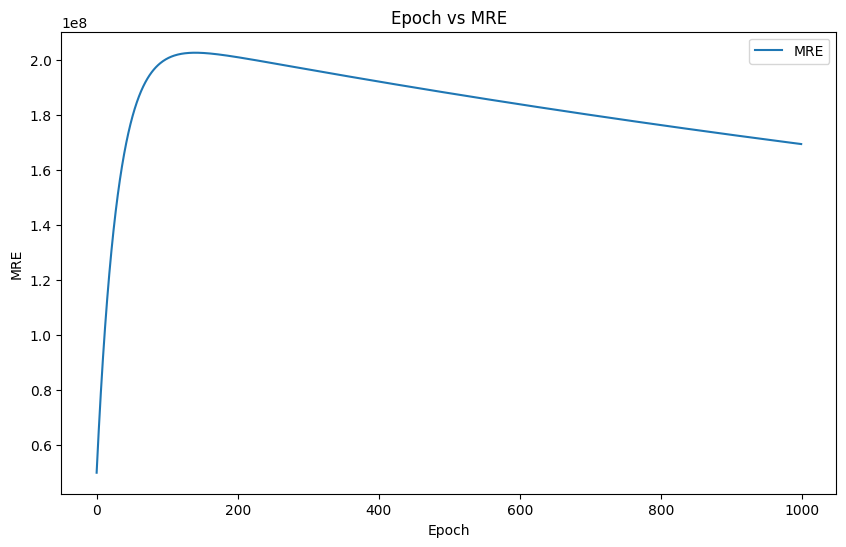

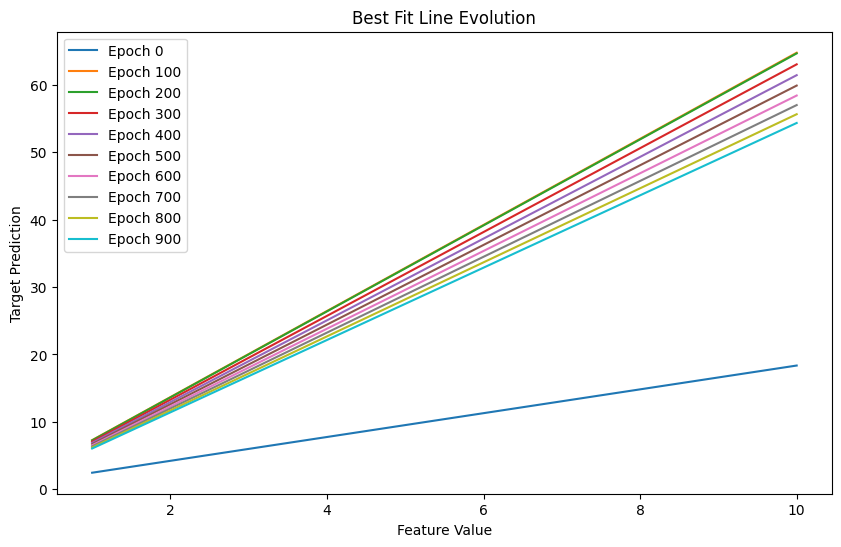

In [74]:
model_with_history = LinearRegressionGDWithHistory(learning_rate=0.0001, epochs=1000)

model_with_history.fit(X, y)

plt.figure(figsize=(10, 6))
plt.plot(model_with_history.history['loss'], label='Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(model_with_history.history['mae'], label='MAE')
plt.title('Epoch vs MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(model_with_history.history['mre'], label='MRE')
plt.title('Epoch vs MRE')
plt.xlabel('Epoch')
plt.ylabel('MRE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i in range(0, 1000, 100):
    coefficients = model_with_history.history['coefficients'][i]
    intercept = model_with_history.history['intercept'][i]
    x_values = np.linspace(1, 10, 400)
    y_values = coefficients[0] * x_values + coefficients[1] * x_values + coefficients[2] * x_values + intercept
    plt.plot(x_values, y_values, label=f'Epoch {i}')

plt.title('Best Fit Line Evolution')
plt.xlabel('Feature Value')
plt.ylabel('Target Prediction')
plt.legend()
plt.show()

This DataFrame represents a 20-day routine dataset with columns for sleep hours, rank of food quality, working hours, rank of health condition, rank of mood, and rank of productivity. The rank of productivity is calculated using weighted averages of sleep hours, food quality rank, working hours, health condition rank, and mood rank, with weights of 0.15, 0.15, 0.3, 0.15, and 0.25 respectively. The rank of productivity values are then clipped to range between 1 and 5.

### Thank you for taking a look at our work! We hope you found it informative and engaging. If you have any questions or feedback, please feel free to share them. We appreciate your time and interest in our work.